<a href="https://colab.research.google.com/github/GoKarolis/ML_training_project/blob/main/kg_red_wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality 


---


by GoKarolis






***Inspiration:***

To use machine learning to determine which physiochemical properties make a wine 'good'!


***Goals:***


*   Create a ML model which finds out the quality of wine
*   Find out what properties 'Good' wine must have
* Find out what properties make wine 'Bad'





***Raw dataset can be found here:***

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

# Init

In [20]:
%matplotlib inline

In [21]:
# ?display
# ??display

In [22]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [23]:
# Set Seaborn colors
sns.set_palette("Set2")

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# wine_data == data
%time  data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/winequality-red.csv')

CPU times: user 11.4 ms, sys: 3.3 ms, total: 14.7 ms
Wall time: 24 ms


# **1. Exploratory data analysis**

# 1.1. Shape

In [26]:
data.shape

(1599, 12)

# 1.2. Descriptive statistics

In [27]:
data.isnull().sum()

#data.isna().sum() 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [28]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [29]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [30]:
"""
def display_all(data):
    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): 
        display(data)

display_all(data.describe(include='all').T)
"""

'\ndef display_all(data):\n    with pd.option_context("display.max_rows", 10000, "display.max_columns", 10000): \n        display(data)\n\ndisplay_all(data.describe(include=\'all\').T)\n'

# 1.3. Data types and more information about the data

In [31]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [32]:
data['quality'].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

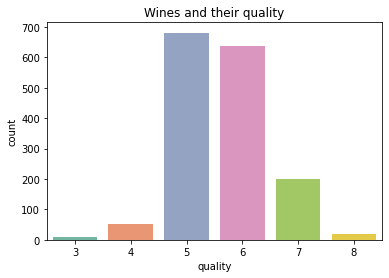

In [33]:
plt.title('Wines and their quality')
sns.countplot(data['quality'])
plt.show()


# **2. Feature engineering**

# **3. Feature pre-processing**

In [34]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

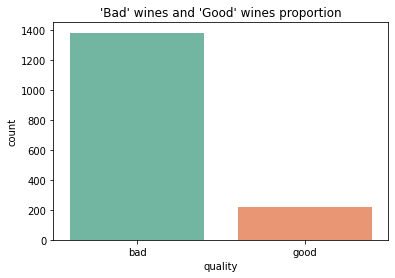

bad     1382
good     217
Name: quality, dtype: int64

In [35]:
plt.title('\'Bad\' wines and \'Good\' wines proportion')
sns.countplot(data['quality'])
plt.show()
data['quality'].value_counts()

In [36]:
label_quality = LabelEncoder()

data['quality'] = label_quality.fit_transform(data['quality'])

X = data.drop('quality', axis = 1)
y = data['quality']



---


Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



---


Data normalization

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [37]:
"""
trans = MinMaxScaler()
data = trans.fit_transform(data)

dataset = DataFrame(data)

print(dataset.describe())

dataset.hist()
plt.show()
"""

'\ntrans = MinMaxScaler()\ndata = trans.fit_transform(data)\n\ndataset = DataFrame(data)\n\nprint(dataset.describe())\n\ndataset.hist()\nplt.show()\n'

Data standardization:

In [38]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = X_train_stand.columns.values.tolist()

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

NameError: ignored

In [ ]:
X_train_stand.describe()

# **4. Building machine learning model**

4.1. Out of the box models performance comparison:

In [ ]:
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('NB', GaussianNB()),
          ('SVM', SVC(gamma='auto')),
          ('XGB', XGBClassifier())]


results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [ ]:
print(results)

In [ ]:
#sns.boxplot(results, labels=names)
#sns.title('Algorithm Comparison')
#sns.show()

plt.boxplot(results, labels=names)
plt.title('Out of the box models performance comparison')
plt.show()

# k-Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))

# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print(classification_report(y_test,y_pred))

# Random forest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print(classification_report(y_test,y_pred))

# Logistic regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

print(classification_report(y_test,lr_predict))

# XGBOOST

Requirements
    Do exploratory data analysis.
    Do feature engineering.
    Do feature preprocessing.
    Build a machine learning model.
    Explore your model results.
Bonus Points
    Move your final model to a Python module.
    Compare multiple machine learning models.
    Do hyperparameter tuning.
    Deploy the model on your own machine.
    Deploy the model on external service.

standard deviation of absolute error (STD of AE)

In [ ]:
# https://www.kaggle.com/alexisbcook/xgboost

xgb = XGBClassifier(n_estimators=1000, 
                    learning_rate=0.1,
                    max_depth=4, 
                    early_stopping_rounds=5,
                    subsample=0.8,
                    #colsample_bytree = 0.4,
                    #gamma=1
                    )  
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
# print(accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

In [ ]:
print(xgb.feature_importances_)

In [ ]:
# plot
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

In [ ]:
plot_importance(xgb)
plt.show()

In [ ]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

# Conclusion. What characteristics make the wine 'good'?

# Notes:



1.   F1 - use everywhere
2.   give splits using important features
3. boosted stumps
4. find noise producing features
5. Hyperparameter tuning visiems
6. Models append: listą pasirašyti
7. Balansuoti: pasverti, oversamplinti, smote
8. Sunormalizuoti data: 0 vidurkis, 1 deviation
9. Pagamint polinomial interactions: polinomial proprocessor
10. Feature importance: Shap values
11. Kaip vadinasi dažniausiai pasitaikanti reikšmė
12. Pradžioj pasižiūrėti feature importance su RF
13. F1 score - to go.
14. Parodyti rezultatų gerėjimą.
15. Ką support reiškia prie F1


To do:
Run all models on Standardized, Normalized and Raw data

